In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import datetime
import pandas_datareader.data as web

In [2]:
dates=[]
prices=[]

In [3]:
start = datetime.datetime(2019, 8, 4)
end = datetime.datetime(2019, 9, 4)

df = web.DataReader("AAPL", "yahoo", start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002


In [4]:
prices = df["Close"].values
dates = df.index.values

In [5]:
def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates), 1))
    svr_lin = SVR(kernel='linear', C=1e3)
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='RBF model')
    plt.plot(dates, svr_poly.predict(dates), color='green', label='Polynomial model')
    plt.plot(dates, svr_lin.predict(dates), color='blue', label='Linear model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.ylim((min(prices)-10, max(prices)+10))
    plt.show()
    
    return svr_rbf.predict(x), svr_poly.predict(x), svr_lin.predict(x)
    #return

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


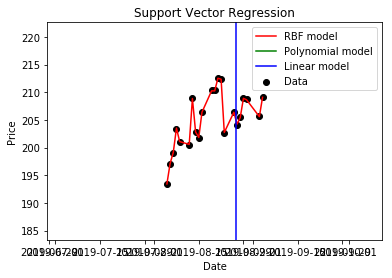

In [6]:
predicted_price = predict_prices(dates, prices, [[2019-9-5]])

In [7]:
predicted_price

(array([205.0595459]), array([nan]), array([8.82877305e+34]))

Future working scope: 
Use stock price history and sentiment analysis with neural networks.